In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ta

In [2]:
def get_ms(tm):
    hhmmss = tm // 1000
    ms = (hhmmss // 10000 * 3600 + (hhmmss // 100 % 100) * 60 + hhmmss % 100) * 1000 + tm % 1000
    ms_from_open = ms - 34200000  # millisecond from stock opening
    if tm >= 130000000:
        ms_from_open -= 5400000
    return ms_from_open

In [3]:
tick_data = pd.read_csv('tickdata_20230414.csv')

In [4]:
order_time = pd.read_csv('what.csv')

In [5]:
# Convert "None" to 0
order_time['volume'] = order_time['volume'].apply(lambda x: 0 if x == 'None' else x)
order_time['volume'] = order_time['volume'].astype(int)

In [6]:
tick_tm = tick_data['COLUMN03'].tolist()
order_time['tickTm'] = [tick_tm[i] for i in order_time['dataIdx'].tolist()]
tick_prc = tick_data['COLUMN07'].tolist()
order_time['tickPrc'] = [tick_prc[i] for i in order_time['dataIdx'].tolist()]

In [7]:
combined_data = pd.merge(tick_data, order_time, left_on="COLUMN01", right_on="dataIdx")

In [8]:
stock_list = combined_data['COLUMN02'].unique()

In [9]:
profit = {}
ignore_list = []
for sym in stock_list:
    sym_data = tick_data[tick_data['COLUMN02'] == sym]
    mkt_mean_prc = sym_data.iloc[-1]['COLUMN49'] / sym_data.iloc[-1]['COLUMN48']


    sym_order_buy = order_time[(order_time['symbol'] == sym) & (order_time['BSflag'] == 'B')]
    buy_mean_prc = (sym_order_buy['volume'] * sym_order_buy['tickPrc']).sum() / 100

    sym_order_sell = order_time[(order_time['symbol'] == sym) & (order_time['BSflag'] == 'S')]
    sell_mean_prc = (sym_order_sell['volume'] * sym_order_sell['tickPrc']).sum() / 100
    if sym_order_sell['volume'].sum() != sym_order_buy['volume'].sum():
        print(f'Volume not match: {sym}')
        ignore_list.append(sym)
    profit[sym] = ((sell_mean_prc - buy_mean_prc) / mkt_mean_prc)

In [10]:
p_val = list(profit.values())
p_val.sort()
print(p_val)

[-236.2529490359501, -224.1438659049655, -209.05592942325765, -111.95382436658691, -102.46202411882335, -90.29065262290517, -85.65583751397917, -67.29596948433809, -59.3876827405457, -54.98489480628139, -51.64830050546773, -39.61326562601514, -38.441172145785856, -33.71839805154862, -28.008944615664593, -27.426876685204515, -26.05061128452836, -24.60065430375345, -23.004565208726476, -19.528425236349097, -19.38596508469263, -19.2886051252261, -19.042361356258752, -18.667246865681193, -17.22851381215018, -15.452802768833589, -14.091466398693392, -12.908905065480871, -12.15778731954647, -10.266302469558946, -9.827929042732174, -7.177356600862257, -6.3407594478495275, -3.411974379432781, -1.7193465937296881, 0.0, 2.5236562738969908, 3.0707317739849502, 4.253041985835935, 4.288018437805297, 4.968614490876794, 5.744037039052387, 6.583430469081983, 8.217560394750643, 8.985192841984167, 11.099600828640064, 11.852541044783525, 12.179762572072095, 12.271708260263608, 12.870329162587689, 13.6964

In [11]:
stock_list = [i for i in stock_list if i not in ignore_list]
profit = {k: v for k, v in profit.items() if k not in ignore_list}
print(profit)

{'688981.SH': 36.93274606033699, '000629.SZ': 25.043799609444058, '000656.SZ': 62.49302692114294, '002738.SZ': -224.1438659049655, '300073.SZ': 30.672296341845808, '000807.SZ': -209.05592942325765, '002603.SZ': -1.7193465937296881, '002056.SZ': 16.487302623118428, '002124.SZ': 15.302954653666518, '002156.SZ': 51.79182963889067, '002340.SZ': 21.099470646018435, '002385.SZ': 23.715294919888887, '002531.SZ': -27.426876685204515, '002407.SZ': -67.29596948433809, '002497.SZ': 27.067863384783614, '000519.SZ': 13.696405712846461, '600585.SH': -6.3407594478495275, '600521.SH': -19.38596508469263, '600418.SH': 74.23616349109163, '603688.SH': 20.148392121076764, '603127.SH': -85.65583751397917, '600988.SH': -9.827929042732174, '600096.SH': -24.60065430375345, '600010.SH': 65.31986112190015, '601866.SH': 120.71674844100848, '600873.SH': 12.179762572072095, '600765.SH': 4.288018437805297, '600862.SH': 8.985192841984167, '600079.SH': 41.14039733546566, '600546.SH': -19.528425236349097, '601991.SH':

In [12]:
negative_profit = [i for i in profit if profit[i] < 0]
print(negative_profit)

['002738.SZ', '000807.SZ', '002603.SZ', '002531.SZ', '002407.SZ', '600585.SH', '600521.SH', '603127.SH', '600988.SH', '600096.SH', '600546.SH', '601991.SH', '000009.SZ', '601666.SH', '601628.SH', '603456.SH', '600171.SH', '600499.SH', '600348.SH', '600487.SH', '600153.SH', '601699.SH', '600056.SH', '600536.SH', '601456.SH', '601225.SH', '601668.SH', '601857.SH', '601888.SH', '601872.SH', '601636.SH', '600406.SH', '300724.SZ', '600160.SH', '600909.SH']


In [13]:
positive_profit = [i for i in profit if profit[i] > 0]
print(positive_profit)

['688981.SH', '000629.SZ', '000656.SZ', '300073.SZ', '002056.SZ', '002124.SZ', '002156.SZ', '002340.SZ', '002385.SZ', '002497.SZ', '000519.SZ', '600418.SH', '603688.SH', '600010.SH', '601866.SH', '600873.SH', '600765.SH', '600862.SH', '600079.SH', '600497.SH', '601778.SH', '601958.SH', '601633.SH', '600893.SH', '600699.SH', '600298.SH', '600026.SH', '600104.SH', '601168.SH', '600157.SH', '603589.SH', '600598.SH', '601919.SH', '600166.SH', '601288.SH', '603077.SH', '600879.SH', '600399.SH', '600582.SH', '601012.SH', '601899.SH', '600062.SH', '601688.SH', '600325.SH', '600021.SH', '600143.SH', '601669.SH', '605358.SH', '600392.SH', '601058.SH', '600030.SH', '600141.SH', '601696.SH', '600027.SH', '603606.SH', '600549.SH', '600968.SH', '600438.SH', '300390.SZ', '300568.SZ', '600859.SH', '600863.SH', '601990.SH', '601066.SH']


In [14]:
print(profit)
average_profit = sum(profit.values()) / len(profit)
print(average_profit)

{'688981.SH': 36.93274606033699, '000629.SZ': 25.043799609444058, '000656.SZ': 62.49302692114294, '002738.SZ': -224.1438659049655, '300073.SZ': 30.672296341845808, '000807.SZ': -209.05592942325765, '002603.SZ': -1.7193465937296881, '002056.SZ': 16.487302623118428, '002124.SZ': 15.302954653666518, '002156.SZ': 51.79182963889067, '002340.SZ': 21.099470646018435, '002385.SZ': 23.715294919888887, '002531.SZ': -27.426876685204515, '002407.SZ': -67.29596948433809, '002497.SZ': 27.067863384783614, '000519.SZ': 13.696405712846461, '600585.SH': -6.3407594478495275, '600521.SH': -19.38596508469263, '600418.SH': 74.23616349109163, '603688.SH': 20.148392121076764, '603127.SH': -85.65583751397917, '600988.SH': -9.827929042732174, '600096.SH': -24.60065430375345, '600010.SH': 65.31986112190015, '601866.SH': 120.71674844100848, '600873.SH': 12.179762572072095, '600765.SH': 4.288018437805297, '600862.SH': 8.985192841984167, '600079.SH': 41.14039733546566, '600546.SH': -19.528425236349097, '601991.SH':

In [15]:
temp = list(profit.values())
temp.sort()
print(temp)

[-236.2529490359501, -224.1438659049655, -209.05592942325765, -111.95382436658691, -102.46202411882335, -90.29065262290517, -85.65583751397917, -67.29596948433809, -59.3876827405457, -54.98489480628139, -51.64830050546773, -39.61326562601514, -38.441172145785856, -33.71839805154862, -28.008944615664593, -27.426876685204515, -26.05061128452836, -24.60065430375345, -23.004565208726476, -19.528425236349097, -19.38596508469263, -19.2886051252261, -19.042361356258752, -18.667246865681193, -17.22851381215018, -15.452802768833589, -14.091466398693392, -12.908905065480871, -12.15778731954647, -10.266302469558946, -9.827929042732174, -7.177356600862257, -6.3407594478495275, -3.411974379432781, -1.7193465937296881, 0.0, 2.5236562738969908, 3.0707317739849502, 4.253041985835935, 4.288018437805297, 4.968614490876794, 5.744037039052387, 6.583430469081983, 8.217560394750643, 8.985192841984167, 11.099600828640064, 11.852541044783525, 12.179762572072095, 12.271708260263608, 12.870329162587689, 13.6964

C:\Users\hoony\AppData\Local\Temp\ipykernel_15688\1864940113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_stock["COLUMN03"] = current_stock["COLUMN03"].apply(lambda x: get_ms(x) / 1000 / 60)
C:\Users\hoony\AppData\Local\Temp\ipykernel_15688\1864940113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_stock['rsi'] = ta_rsi.rsi()
C:\Users\hoony\AppData\Local\Temp\ipykernel_15688\1864940113.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

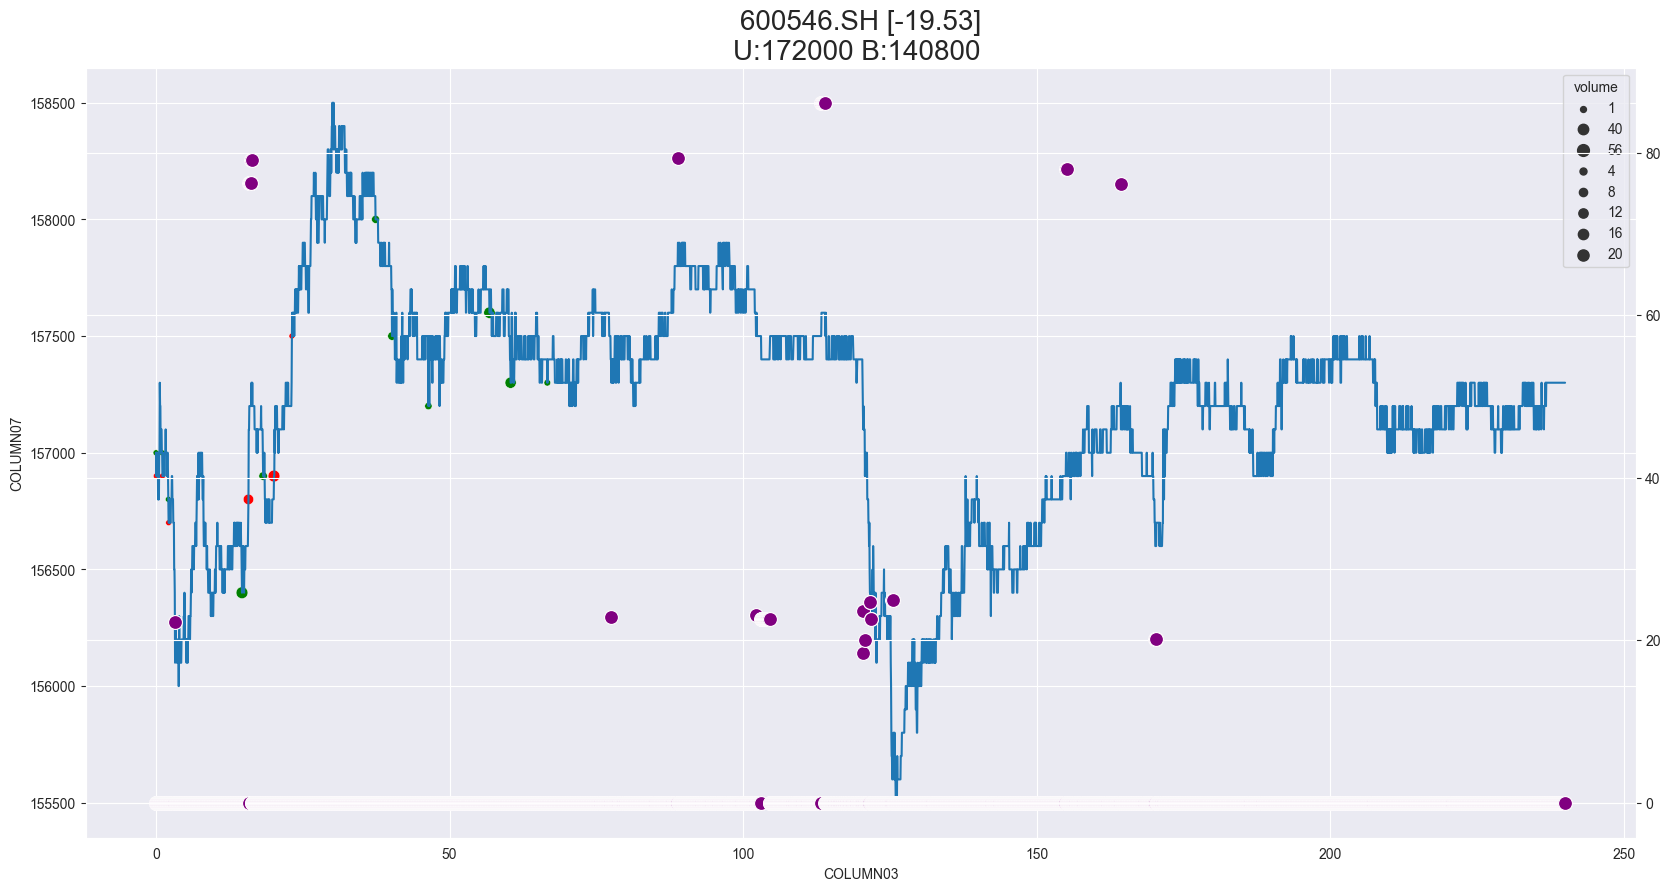

In [34]:
cs = negative_profit[-25]
current_stock = combined_data[combined_data['COLUMN02'] == cs]
current_stock["COLUMN03"] = current_stock["COLUMN03"].apply(lambda x: get_ms(x) / 1000 / 60)
ta_rsi = ta.momentum.RSIIndicator(current_stock['COLUMN07'], window=20)
current_stock['rsi'] = ta_rsi.rsi()
current_stock['rsi'] = current_stock['rsi'].fillna(0)
fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()
# Plot the first stock
sns.lineplot(
    x = current_stock['COLUMN03'],
    y = current_stock['COLUMN07'],
    ax = ax
)
sns.scatterplot(
    x = current_stock['COLUMN03'],
    y = [0 if 75 >= i >= 25 else i for i in current_stock['rsi'].tolist()],
    ax = ax2,
    color='purple',
    s=100
)

sns.scatterplot(
    x = current_stock[current_stock['BSflag'] == 'S']['COLUMN03'],
    y = current_stock[current_stock['BSflag'] == 'S']['COLUMN07'],
    size=current_stock[current_stock['BSflag'] == 'S']['volume'],
    color = 'red',
    ax = ax
)
sns.scatterplot(
    x = current_stock[current_stock['BSflag'] == 'B']['COLUMN03'],
    y = current_stock[current_stock['BSflag'] == 'B']['COLUMN07'],
    size=current_stock[current_stock['BSflag'] == 'B']['volume'],
    color = 'green',
    ax = ax
)
plt.title(f'{cs} [{profit[cs]:.2f}]\nU:{current_stock["COLUMN52"].unique()[0]} B:{current_stock["COLUMN53"].unique()[0]} ', fontsize=20)
plt.show()

In [110]:
test = current_stock["COLUMN07"].tolist()[:-100]

In [147]:
test_atr = ta.volatility.AverageTrueRange(close=current_stock['COLUMN07'], high=current_stock['COLUMN05'], low=current_stock['COLUMN06'], window=250)
min([i for i in test_atr.average_true_range().tolist() if i > 0])

C:\Users\hoony\anaconda3\envs\tf\lib\site-packages\ta\volatility.py:50: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  atr[self._window - 1] = true_range[0: self._window].mean()


1258.0

In [18]:
test_cci = ta.trend.CCIIndicator(high=current_stock['COLUMN05'], low=current_stock['COLUMN06'], close=current_stock['COLUMN07'], window=14)
test_cci.cci()

50        NaN
51        NaN
115       NaN
212       NaN
313       NaN
         ... 
470653    0.0
470908    0.0
471162    0.0
471422    0.0
471677    0.0
Name: cci, Length: 4557, dtype: float64

In [141]:
current_stock["COLUMN07"].tolist()[-1:]

[218000]

In [144]:
current_stock["COLUMN05"].tolist()[-1:][0] - current_stock["COLUMN06"].tolist()[-1:][0]

3400

In [39]:
current_stock["COLUMN07"].pct_change(periods=500)

43             NaN
149            NaN
255            NaN
353            NaN
443            NaN
            ...   
471605    0.001273
471694    0.001273
471770    0.001273
471860    0.001273
471933    0.001273
Name: COLUMN07, Length: 4726, dtype: float64

In [148]:
current_stock

,COLUMN01,COLUMN02,COLUMN03,COLUMN04,COLUMN05,COLUMN06,COLUMN07,COLUMN08,COLUMN09,COLUMN10,...,COLUMN53,COLUMN54,COLUMN55,symbol,BSflag,dataIdx,volume,tickTm,tickPrc,rsi
41,41,600862.SH,0.00,219400,219400,219400,219400,219400,219700,219800,...,197500,212530,232270,600862.SH,B,41,1,93000000,219400,0.000000
152,152,600862.SH,0.05,219400,219400,219000,219000,219400,219700,219800,...,197500,212970,231880,600862.SH,S,152,1,93003000,219000,0.000000
250,250,600862.SH,0.10,219400,219400,219000,219400,219400,219600,219700,...,197500,213240,231640,600862.SH,N,250,0,93006000,219400,0.000000
346,346,600862.SH,0.15,219400,219700,219000,219700,219700,219800,220000,...,197500,213410,231630,600862.SH,N,346,0,93009000,219700,0.000000
447,447,600862.SH,0.20,219400,219700,219000,219500,219700,219800,220000,...,197500,213760,231550,600862.SH,N,447,0,93012000,219500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471593,471593,600862.SH,239.80,219400,220300,216900,218000,218000,0,0,...,197500,215200,225980,600862.SH,N,471593,0,145948000,218000,47.623941
471709,471709,600862.SH,239.85,219400,220300,216900,218000,218000,0,0,...,197500,215200,225980,600862.SH,N,471709,0,145951000,218000,47.623941
471775,471775,600862.SH,239.90,219400,220300,216900,218000,218000,0,0,...,197500,215220,225980,600862.SH,N,471775,0,145954000,218000,47.623941
471851,471851,600862.SH,239.95,219400,220300,216900,218000,218000,0,0,...,197500,215220,225980,600862.SH,N,471851,0,145957000,218000,47.623941
